# Analysis of results for "Why is Auto-Encoding Difficult for Genetic Programming?"

(James McDermott, EuroGP 2019)

First, run the experiments using linear_gp.py

Then choose which set of results to process by uncommenting the appropriate dirname below

Then run through the notebook to produce analyses of the results.

In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font="sans-serif")

In [2]:
def parse_filename(filename):
    # eg AE_GLASS_10_10_10_4_100000_0.dat
    filename = filename[:-4]
    AE, dataset, n_calc, n_instrs, L, n_hidden, n, rep = filename.split("_")
    return int(n_calc), int(n_instrs), int(L)

In [6]:
#dirname = "SR_experiment_multi_identical_fake_results"
#dirname = "AE_experiment_results" # don't put / at the end
#dirname = "SR_experiment_single_fake_results"
dirname = "SR_experiment_multi_fake_results"


ylims = {
    "AE_experiment_results": (0.03, 0.2, .5, .5),
    "SR_experiment_multi_fake_results": (0.02, 0.2, .35, .35),
    "SR_experiment_multi_identical_fake_results": (0.01, 0.015, .05, .05),
    "SR_experiment_single_fake_results": (0.008, 0.04, .05, .05)
}

In [7]:
baselines = {
    "AE_experiment_results": (0.000855366290352, 0.00902790309032),
    "SR_experiment_multi_fake_results": (0.0164665453876, 0.0650096508776),
    "SR_experiment_multi_identical_fake_results": (0.0063283022168, 0.00984307191487),
    "SR_experiment_single_fake_results": (0.0063283022168, 0.00984307191487)
}

In [8]:
filenames = os.listdir(dirname)

# Read in last line of each file

In [9]:
final_results = []
for filename in filenames:
    df = pd.read_csv(os.path.join(dirname, filename), 
                     header=None, 
                     names=["it", "MSE (train)", "MSE (test)", "Time (s)"],
                     delimiter="\s+")
    result = tuple(df.iloc[-1])
    indvars = parse_filename(filename)
    final_results.append(indvars + result)   
df = pd.DataFrame(final_results)
df.columns = ["n_calc", "n_instr", "L", "it", "MSE (train)", "MSE (test)", "time"]

# Violin plots for setups and L

/Users/jmmcd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


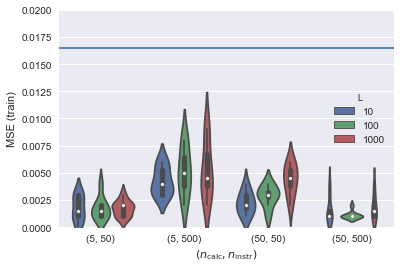

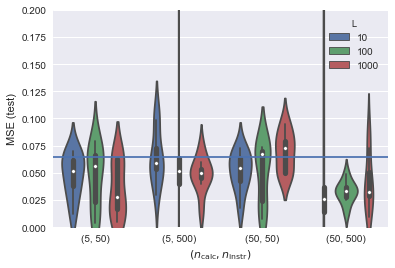

In [10]:
df_tmps = []
for L in [10, 100, 1000]:
    for setup in [(5, 50), (5, 500), (50, 50), (50, 500)]:
        n_calc, n_instrs = setup
        #print(type(n_calc))
        df_tmp = df.loc[(df['L'] == L) & (df['n_calc'] == n_calc) & (df['n_instr'] == n_instrs)]
        setup = str((n_calc, n_instrs))
        df_tmp['setup'] = setup
        # print(df_tmp.head())
        df_tmps.append(df_tmp)
df_tmp = pd.concat(df_tmps)

ax = sns.violinplot(x="setup", y="MSE (train)", hue="L", data=df_tmp, title="Train error")
ax.set_xlabel(r"$(n_{\mathrm{calc}}, n_{\mathrm{instr}})$")
ax.set(ylim=(0, ylims[dirname][0]))
ax.axhline(y=baselines[dirname][0])
plt.savefig(dirname +  "_train_error_L_v_setups.pdf")
plt.show()
plt.close()
ax = sns.violinplot(x="setup", y="MSE (test)", hue="L", data=df_tmp, title="Test error")
ax.set_xlabel(r"$(n_{\mathrm{calc}}, n_{\mathrm{instr}})$")
ax.axhline(y=baselines[dirname][1])
ax.set(ylim=(0, ylims[dirname][1]))
plt.savefig(dirname + "_test_error_L_v_setups.pdf") # don't put into a results dir
plt.show()
plt.close()

# Fitness v iteration plots train and test

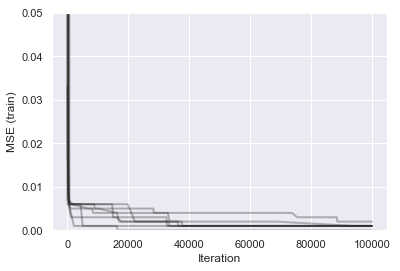

In [129]:
n_calc = 50
n_instrs = 50
L = 1000
for filename in filenames:
    indvars = parse_filename(filename)
    if indvars != (n_calc, n_instrs, L): continue
    df_tmp = pd.read_csv(os.path.join(dirname, filename), 
                     header=None, 
                     names=["it", "MSE (train)", "MSE (test)", "Time (s)"],
                     delimiter="\s+")
    d = list(df_tmp["MSE (train)"])
    d_its = list(df_tmp["it"])
    if d_its[-1] != 99998: d.append(d[-1]); d_its.append(99998) # a few runs finished early (that is fixed now) but hack
    ax = sns.lineplot(d_its, d, color='k', alpha=0.3, lw=2)
ax.set(ylim=(0, ylims[dirname][2]))
plt.xlabel("Iteration")
plt.ylabel("MSE (train)")
plt.savefig(dirname + "_fitness_v_its_train.pdf")
plt.show()
plt.close()


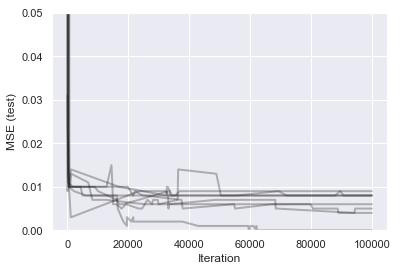

In [130]:
n_calc = 50
n_instrs = 50
L = 1000
for filename in filenames:
    indvars = parse_filename(filename)
    if indvars != (n_calc, n_instrs, L): continue
    df_tmp = pd.read_csv(os.path.join(dirname, filename), 
                     header=None, 
                     names=["it", "MSE (train)", "MSE (test)", "Time (s)"],
                     delimiter="\s+")
    d = list(df_tmp["MSE (test)"])
    d_its = list(df_tmp["it"])
    if d_its[-1] != 99998: d.append(d[-1]); d_its.append(99998) # a few runs finished early (that is fixed now) but hack    
    ax = sns.lineplot(d_its, d, color='k', alpha=0.3, lw=2)
ax.set(ylim=(0, ylims[dirname][3]))
plt.xlabel("Iteration")
plt.ylabel("MSE (test)")
plt.savefig(dirname + "_fitness_v_its_test.pdf")
plt.show()
plt.close()


In [209]:
AE_exps = ["GLASS", "ACA", "PenDigits"]
ylims = {
    "GLASS": (0.03, 0.3, .5, .5),
    "ACA": (0.015, 0.3, .35, .35),
    "PenDigits": (0.003, 0.3, .05, .05),
}

n_calc, n_instrs, L = (50, 50, 1000)

In [210]:
baselines = {
    "GLASS": (0.000855366290352, 0.00902790309032),
    "ACA": (0.0180947785878, 0.0404179795234),
    "PenDigits": (0.00297262627259, 0.0127158693297)
}

GLASS
    0   1     2        3      4      5      6
0  50  50  1000  99802.0  0.018  0.108  463.9
1  50  50  1000  98382.0  0.009  0.096  673.6
2  50  50  1000  98162.0  0.018  0.031  462.0
3  50  50  1000  95035.0  0.017  0.127  471.9
4  50  50  1000  97267.0  0.013  0.020  477.3


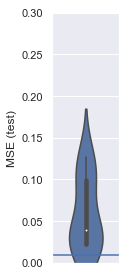

ACA
    0   1     2        3      4      5       6
0  50  50  1000  99998.0  0.052  0.076  3423.5
1  50  50  1000  99998.0  0.070  0.119  3490.0
2  50  50  1000  99998.0  0.049  0.093  3424.8
3  50  50  1000  99998.0  0.058  0.106  3490.9
4  50  50  1000  99998.0  0.052  0.102  3435.7


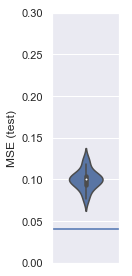

PenDigits
    0   1     2        3      4      5       6
0  50  50  1000  99998.0  0.021  0.150  5820.5
1  50  50  1000  99998.0  0.022  0.128  5773.8
2  50  50  1000  99998.0  0.019  0.168  5800.3
3  50  50  1000  99998.0  0.025  0.142  5796.1
4  50  50  1000  99998.0  0.018  0.136  5808.3


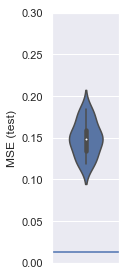

In [214]:
for AE_exp in AE_exps:
    print(AE_exp)
    dirname = "AE_%s_experiment_results" % AE_exp
    filenames = os.listdir(dirname)
    final_results = []
    for filename in filenames:
        indvars = parse_filename(filename)
        if indvars != (n_calc, n_instrs, L): continue

        df = pd.read_csv(os.path.join(dirname, filename), 
                     header=None, 
                     names=["it", "MSE (train)", "MSE (test)", "Time (s)"],
                     delimiter="\s+")
        result = tuple(df.iloc[-1])
        indvars = parse_filename(filename)
        final_results.append(indvars + result)   
    df = pd.DataFrame(final_results)
    print(df.head())
    df.columns = ["n_calc", "n_instrs", "L", "it", "MSE (train)", "MSE (test)", "time"]
    ax = sns.violinplot(y="MSE (test)", data=df, title="Test error", width=0.5)
    ax.set_xlabel("")
    ax.axhline(y=baselines[AE_exp][1]) # baseline
    plt.gcf().set_size_inches(2, 4)
    ax.set(ylim=(0, ylims[AE_exp][1]))
    plt.tight_layout()
    plt.savefig(dirname +  "_test_error.pdf")
    plt.show()
    plt.close()

# PCA baselines

Obtained using scikit-learn

GLASS with PCA n=4

* train 0.000855366290352
* test 0.00902790309032

ACA with PCA n=4

* train 0.0180947785878
* test 0.0404179795234

PenDigits with PCA n=5

* train 0.00297262627259
* test 0.0127158693297